Import Libraries

In [2]:
# data processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# cross validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

# model optimization
from sklearn.model_selection import GridSearchCV


Data Loading

In [3]:
csv = r"../raw/raw.csv"
df = pd.read_csv(csv)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Data Cleansing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()


np.int64(0)

In [8]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [9]:
# Drop duplicates and reset index
df = df.drop_duplicates().reset_index(drop=True)

In [10]:
# drop unused columns
df = df.drop("customerID", axis=1)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Exploratory Data ANalysis

In [ ]:
# Change columns into category type
cat_cols = ['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

df[cat_cols] = df[cat_cols].astype('category')


PaymentMethod categories: ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
Contract categories: ['Month-to-month', 'One year', 'Two year']
InternetService categories: ['DSL', 'Fiber optic', 'No']
MultipleLines categories: ['No', 'No phone service', 'Yes']


In [17]:
df.columns
df.describe(include='category')


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [ ]:
#  One-hot encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

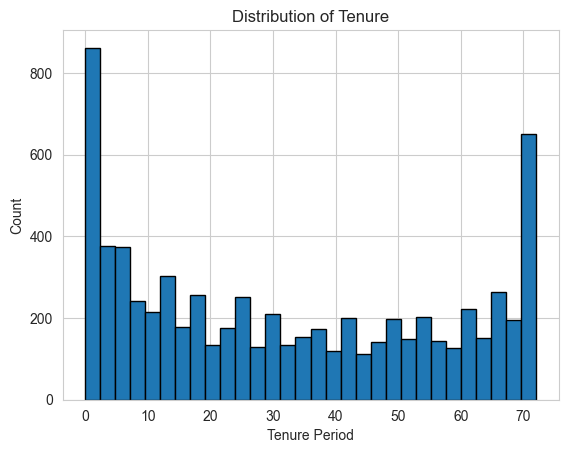

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [64]:
# Histogram to determine bins for Tenure
df['tenure'].hist(bins=30, edgecolor='black')
plt.xlabel('Tenure Period')
plt.ylabel('Count')
plt.title('Distribution of Tenure')
plt.show()

# Quick statistics
df['tenure'].describe()


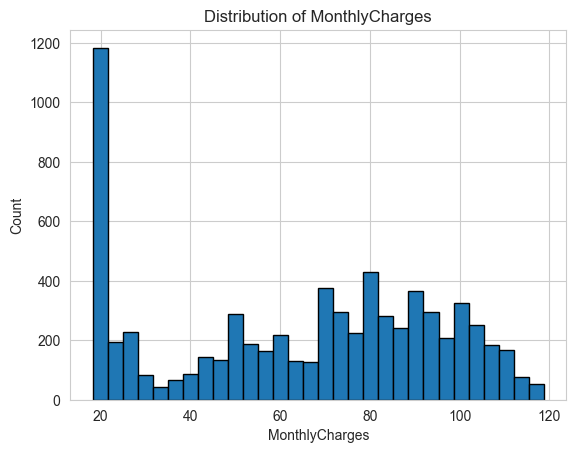

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [ ]:
# Histogram to determine bins for MonthlyCharges
df['MonthlyCharges'].hist(bins=30, edgecolor='black')
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')
plt.title('Distribution of MonthlyCharges')
plt.show()

df['MonthlyCharges'].describe()


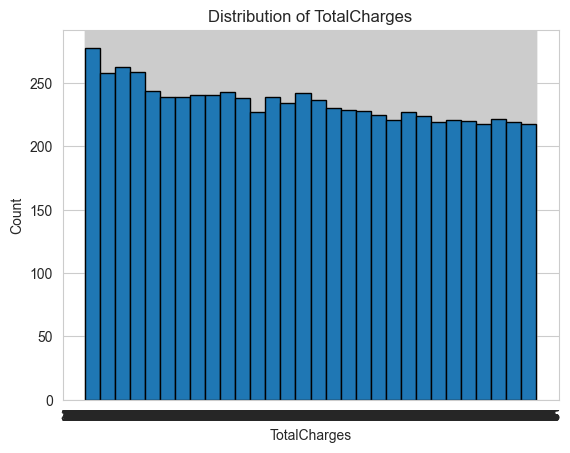

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [66]:
# Histogram to determine bins for TotalCharges
df['TotalCharges'].hist(bins=30, edgecolor='black')
plt.xlabel('TotalCharges')
plt.ylabel('Count')
plt.title('Distribution of TotalCharges')
plt.show()

df['TotalCharges'].describe()


In [60]:
# remaning cols into buckets: tenure, monthlyCharges, TotalCharges
bins = []

# def check_col(name, data):
#     types = []
#     count = {}
#     for val in data[name]:
#         if val not in types:
#             types.append(val)
#             count[val] = 1
#         else:   
#             count[val] += 1
#     return types

In [61]:
# to_drop = ["tenure", "OnlineBackup", "DeviceProtection","Contract", "PaperlessBilling", "PaymentMethod"]
# df = df.drop(to_drop, axis=1)
# df["MultipleLines"] = df["MultipleLines"].replace({"No": 0.7, "No phone service": 0})
# df = df.replace({"Yes": 1, "No": 0, "Male": 1, "Female": 0})
# types = check_col("InternetService", df)
# df = df.replace({types[0]: 1, types[1]: 1})
# df.isna().sum()

In [62]:
# # Drop columns based on visualization
# to_drop = []
# for col in categorical_features:
#     if df[col].value_counts(normalize=True).min() < 0.1:
#         to_drop.append(col)
# df = df.drop(to_drop, axis=1)